### Student Information
Name: Yap Wai Leong 葉偉良

Student ID: 108065511

GitHub ID: 55986614

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

---

<div style="background-color:lightblue;">
    <center>
        <h3 style="color:red; font-size:24px; font-family:Segoe Print;">Take Home Exercises</h3>
    </center>
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 2</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X[:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [5]:
X.where(X['category'] == 1).dropna()[:10]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...       1.0  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...       1.0  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...       1.0  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...       1.0  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...       1.0  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...       1.0  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...       1.0  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...       1.0  comp.graphics
39  From: g9134255@wampyr.cc.uow.edu.au (Coronado ...       1.0  comp.graphics
42  From: gwang@magnus.acs.ohio-state.edu (Ge Wang...       1.0  comp.graphics

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 5</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    <font style="background-color:lightgrey; font-weight:bold;">.isnull()</font> doesn't work on this case. Except for numpy NaN and None, <font style="background-color:lightgrey; font-weight:bold;">.isnull()</font> will classify 'NaN', 'None', and '' as String Type instead of null, which bring the result with some of them doesn't recognise as null.
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 6</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [8]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [9]:
X_sample[0:4]

text  category  \
756  From: gchin@ssf.Eng.Sun.COM (Gary Chin) Subjec...         3   
986  From: maridai@comm.mot.com (Marida Ignacio) Su...         3   
74   From: kcochran@nyx.cs.du.edu (Keith "Justified...         0   
124  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   

              category_name  
756  soc.religion.christian  
986  soc.religion.christian  
74              alt.atheism  
124  soc.religion.christian

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [10]:
len(X)

2257

In [11]:
X_sample = X.sample(n=1000) #random state
print(len(X_sample))

1000


In [12]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

In [13]:
X_sample[0:4]

text  category  \
182   From: sigma@rahul.net (Kevin Martin) Subject: ...         1   
2199  From: romdas@uclink.berkeley.edu (Ella I Baff)...         2   
1071  From: dleonar@andy.bgsu.edu (Pixie) Subject: R...         3   
1785  From: marka@hcx1.ssd.csd.harris.com (Mark Ashl...         3   

               category_name  
182            comp.graphics  
2199                 sci.med  
1071  soc.religion.christian  
1785  soc.religion.christian

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    It's super obvious that the size of <font style="background-color:lightgrey; font-weight:bold;">X_sample</font> is different from that of <font style="background-color:lightgrey; font-weight:bold;">X</font>. The data of <font style="background-color:lightgrey; font-weight:bold;">X_sample</font> is not sorted and the size of <font style="background-color:lightgrey; font-weight:bold;">X_sample</font> keeps unchanged at 1000 since it takes sampling of 1000 size from <font style="background-color:lightgrey; font-weight:bold;">X</font>. However, the data of <font style="background-color:lightgrey; font-weight:bold;">X_sample</font> might not as same as before if we take sampling again.
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 8</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [14]:
import matplotlib.pyplot as plt

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

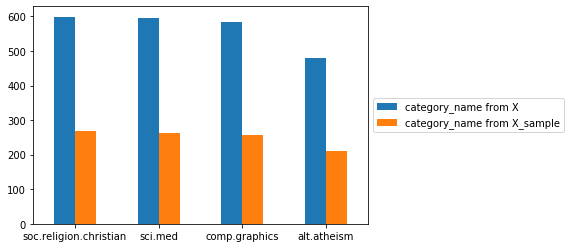

In [15]:
index = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']

df = pd.DataFrame({'category_name from X': X.category_name.value_counts().tolist(),
                  'category_name from X_sample': X_sample.category_name.value_counts().tolist()}, index=index)
df.plot.bar(rot=0)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 10</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [17]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [18]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [19]:
idx = list(X_counts[4, 1:100].toarray()[0]).index(1) + 1
count_vect.get_feature_names()[idx]

'01'

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 11</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [20]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    As mentioned in the Lab, the data is too sparse to make visualization with heatmap.To get a nice and useful visualization, I would first sum up the frequency of each term with all documents, and then show it with word cloud, which is more meaningful on this case.
</div>

In [21]:
from wordcloud import WordCloud
from collections import Counter

In [22]:
def wordCloud(counter):
    wc = WordCloud(width = 1200, height = 800,
                  background_color = "black")
    
    wc.generate_from_frequencies(counter)
    
    fig = plt.figure(figsize = (6, 4))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

<font style="font-size:15px; font-family:Comic Sans MS;">Compute the terms frequency</font>

In [23]:
tfq = []
for j in range(0,X_counts.shape[1]):
    tfq.append(sum(X_counts[:,j].toarray()))

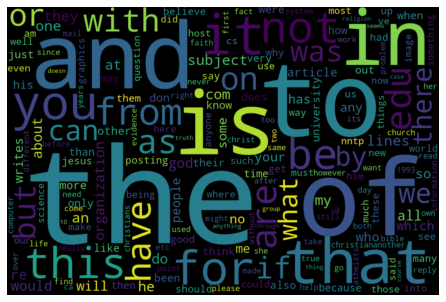

In [24]:
feature_names = count_vect.get_feature_names()

counter = Counter()
for wrd, fq in zip(feature_names, tfq):
    counter[wrd] = fq[0]
    
wordCloud(counter)

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    With word cloud, we could see what term would be most frequent appear on the documents.Moreover, we could plot a frequency log barchart<font color="red">(why log? because some of their frequencies are too small to see. In this case, log makes your life better. yo!!!)</font>
</div>

In [25]:
import math
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
tfLog = []
for j in range(0,X_counts.shape[1]):
    tfLog.append(math.log(sum(X_counts[:,j].toarray())))

<font style="font-size:15px; font-family:Comic Sans MS;">Plot first 100 of them in barchart</font>

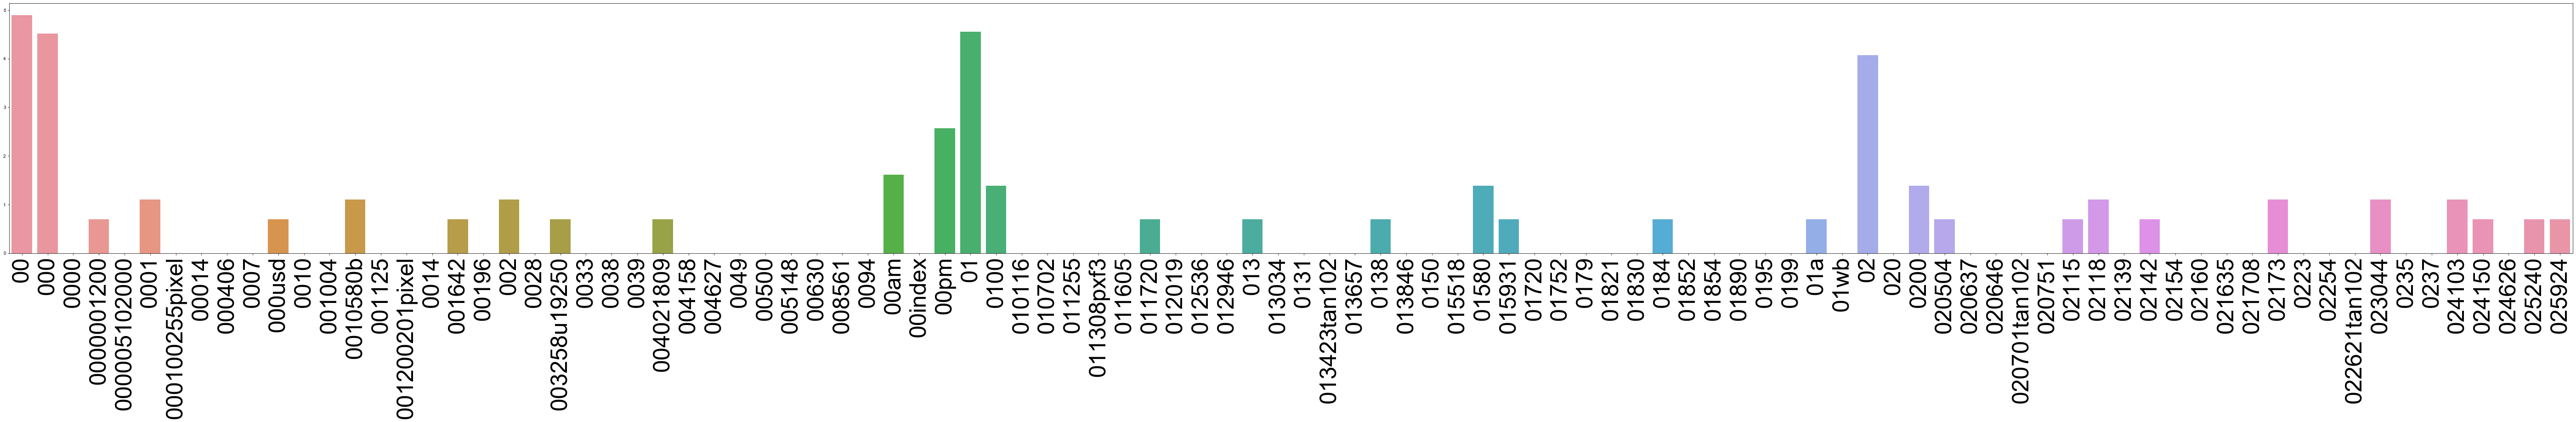

In [26]:
import seaborn as sborn

plt.subplots(figsize=(100, 10))
g = sborn.barplot(x=count_vect.get_feature_names()[:100],
                y=tfLog[:100])

sborn.set(font_scale=2)

g.set_xticklabels(count_vect.get_feature_names()[:100], fontsize=50);
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 12</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [27]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #import Axes3D for plottin 3d scatter

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

In [28]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
colors = ['red', 'purple', 'black', 'green']

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecate

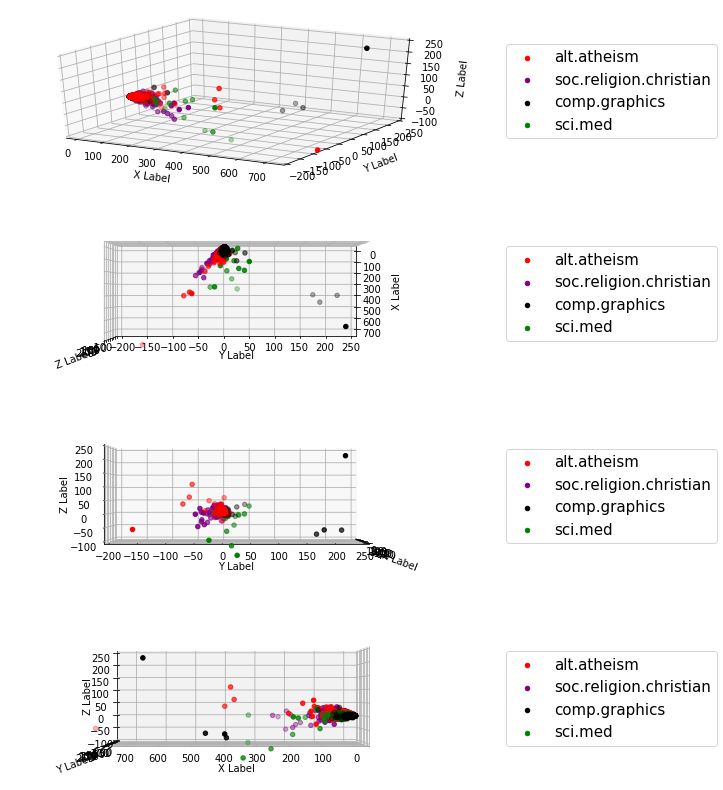

In [29]:
# plot
sborn.reset_orig()

fig = plt.figure(figsize = (8,18))
figIdx = 0

elevAng = [15, 90, 0, 0]
axisAng = [325, 0, 0, 90 ]

row = len(axisAng)

for i in range(row):
    figIdx += 1
    ax = fig.add_subplot(row + 1, 1, figIdx, projection='3d')

    for c, category in zip(colors, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c = c, marker='o',label = category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.set_xlim3d(-25, 750)
    ax.set_ylim3d(-200,250)
    ax.set_zlim3d(-100,250)

    ax.legend(loc = 'center left', bbox_to_anchor = (1.1, 0.5), fontsize=15)
    if i > 0:
        ax.view_init(elev = elevAng[i], azim = axisAng[i])

plt.show()

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    Almost the point are assemble on 0 < X < 200, -50 < Y < 50, -50 < Z < 50
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 13</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [30]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [31]:
len(term_frequencies)

35788

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [32]:
import plotly.graph_objects as go

layout = go.Layout(xaxis={'type': 'category'})
data = [go.Bar(
            x=count_vect.get_feature_names()[:300],
            y=term_frequencies[:300],
            text=term_frequencies[:300],
            textposition='auto',
        )]
fig = go.Figure(data, layout)


fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=10))
fig.update_layout(autosize=False)
fig.show()

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 14</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    To make visualization more meaningful, I will first sort the terms by its frequency, then select top 20 of them (that is what question ask for : reduce the number of terms) and plot them into barchart.
</div>

In [33]:
#Makes the list into pandas dataframe
df = pd.DataFrame({'Terms' : count_vect.get_feature_names(),
                  'Freq'  : term_frequencies})

df.sort_values(by=['Freq'], inplace=True, ascending=False)
df.head(3)

Terms   Freq
32142   the  29825
23610    of  17660
32493    to  17222

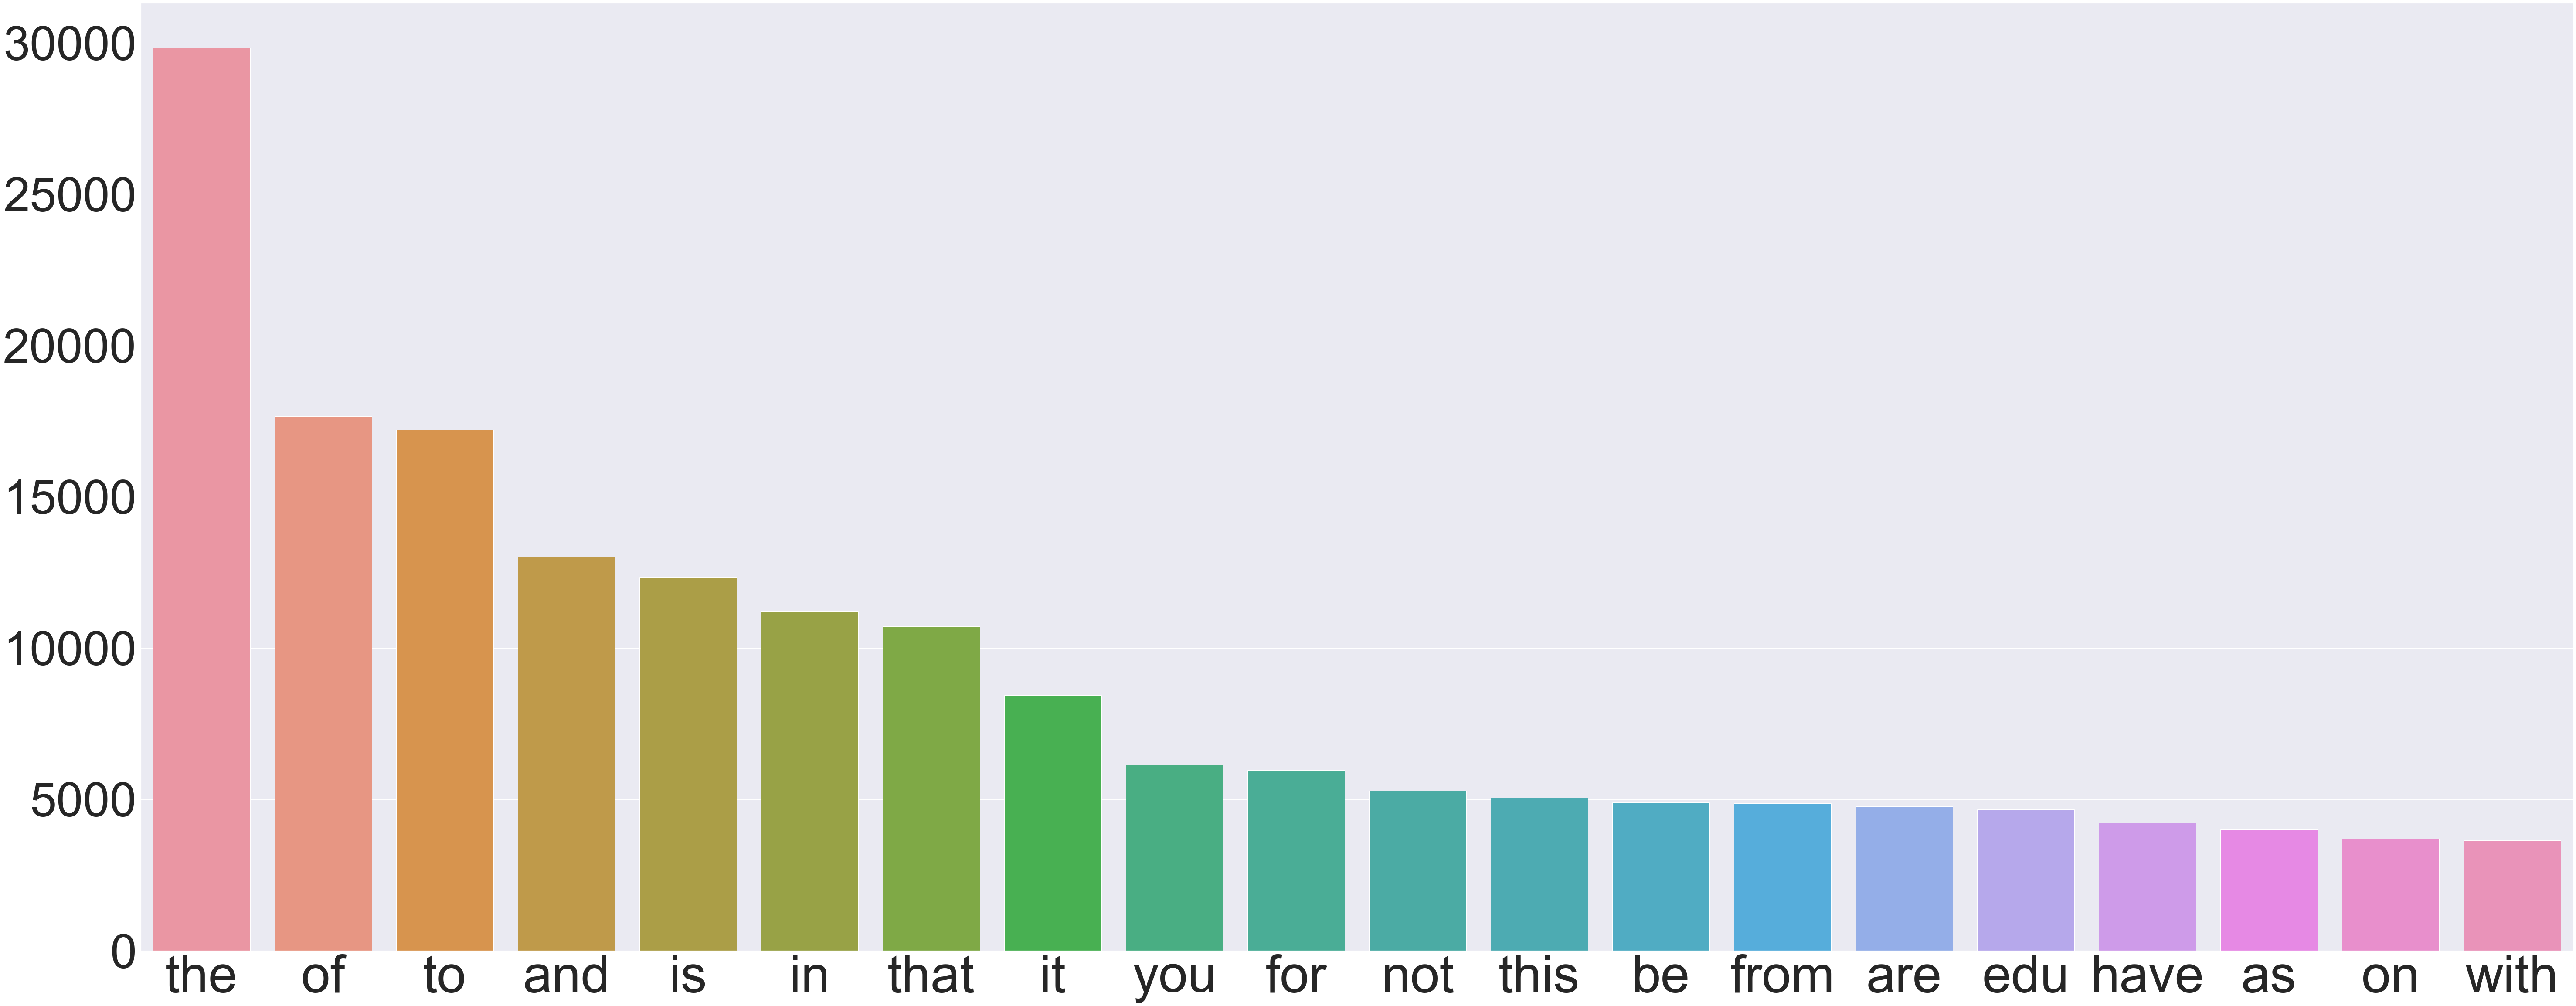

In [34]:
import seaborn as sborn

TERMS = df['Terms'].values
FREQ = df['Freq'].values

sborn.set(font_scale=10)

plt.subplots(figsize=(100, 40))
g = sborn.barplot(x = TERMS.tolist()[:20], 
                y = FREQ.tolist()[:20])
g.set_xticklabels(TERMS.tolist()[:20], fontsize=120);

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 15</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

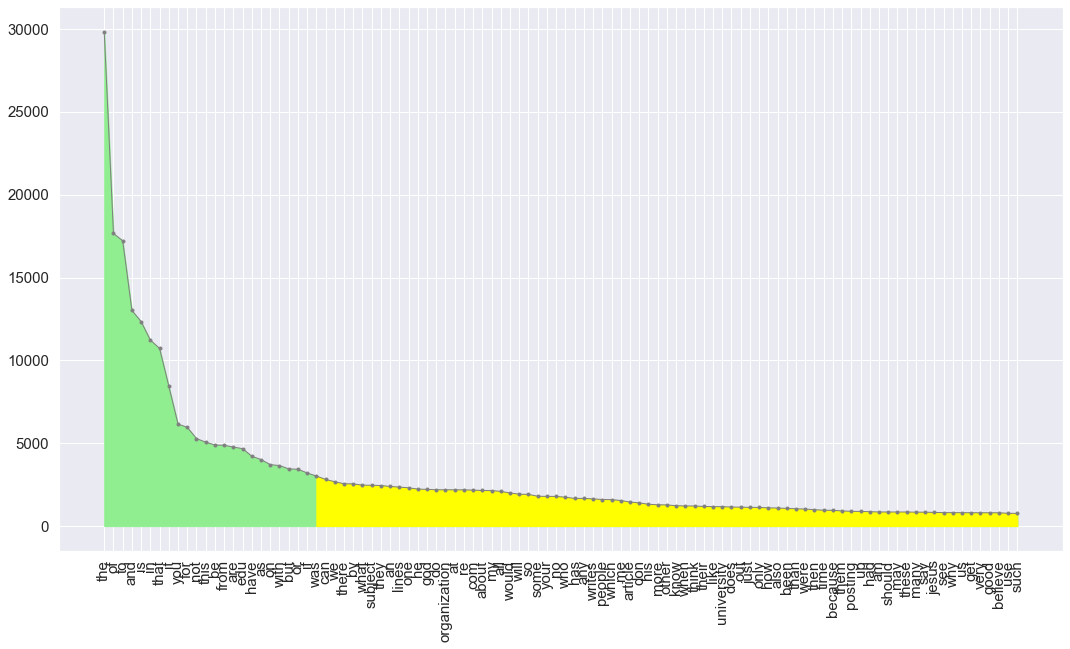

In [35]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot()

ax.plot(TERMS.tolist()[:100], FREQ.tolist()[:100], marker='.', color = 'grey', lw = 1)

ax.xaxis.set_tick_params(labelsize=15, rotation=90)
ax.yaxis.set_tick_params(labelsize=15)

T = TERMS.tolist()[:100]
F = FREQ.tolist()[:100]

d = FREQ[:100].mean()
ax.fill_between(T, F, color = 'lightgreen', interpolate = True)
ax.fill_between(T, F, where = F <= d, color='yellow', interpolate = True)

plt.show()

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">Exercise 16</font>
<br />
<font style="font-size:15px; font-family:Comic Sans MS;">Preparation</font>

In [36]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [37]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [38]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

<font style="font-size:15px; font-family:Comic Sans MS;">My Answer</font>

In [39]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    Although it didn't show any error, but it still doesn't works well when we examine the column 'bin_category_name' on the table above. In my opinion, this is because we haven't Standardize the value in column 'category_name'. To make this works, we have to just change the 'transform' into 'fit_transform', which standardize the given feature by removing the mean and scaling to unit variance.
</div>

In [40]:
X['bin_category_name'] = mlb.fit_transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 1, 0]

<div style="background-color:#FFFF66; font-size:15px; font-family:Comic Sans MS;">
    Now, it works fine. :)
</div>

---

<div style="background-color:lightblue;">
    <center>
        <h3 style="color:red; font-size:24px; font-family:Segoe Print;">Assignment</h3>
    </center>
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">1.Data Preparation & Data Transformation</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    First, I created a function call readTXT, to preprocess the information from reading TXT files, and store them into two list(since they have only two columns).
</div>

In [41]:
#Read the files from the location given
#Preprocessing them
#Store them into lists, and return
#fileloc : location of file
#act : action on file, eg.read, write, read & write
def readTXT(fileloc, act = 'r'):
    f = open(fileloc, act)
    data = f.read().split('\n')
    f.close()
    
    X = []
    y = []
    for d in data:
        try:
            cols = d.split("\t")
            
            if len(cols) >= 2:
                X.append(cols[0])
                y.append(cols[1])
            
        except IndexError as err:
            print(err)
            
    return X, y

<div style="font-size:15px; font-family:Comic Sans MS;">
    Read the data from files
</div>

In [42]:
filesLocs = ['datasets/amazon_cells_labelled.txt', 'datasets/imdb_labelled.txt', 'datasets/yelp_labelled.txt']
sentences, scores = [], []
for fL in filesLocs:
    X, y = readTXT(fL)
    sentences += X
    scores += y

<div style="font-size:15px; font-family:Comic Sans MS;">
    Check the type of elements in list 'scores'
</div>

In [43]:
type(scores[0])

str

<div style="font-size:15px; font-family:Comic Sans MS;">
    Change the type of elements in list 'scores' into int type
</div>

In [44]:
scores = list(map(int, scores))

<div style="font-size:15px; font-family:Comic Sans MS;">
    Now the type of elements in list 'scores' is int type
</div>

In [45]:
type(scores[0])

int

<div style="font-size:15px; font-family:Comic Sans MS;">
    Create pandas dataframe with those two lists
</div>

In [46]:
# categories
categories = ['Sentences', 'Scores']

df_Asgm = pd.DataFrame(list(zip(sentences, scores)), columns = categories)
df_rows, df_cols = df_Asgm.shape

print("Rows : " + str(df_rows))
print("Cols : " + str(df_cols))
df_Asgm.head(20)

Rows : 3000
Cols : 2


Sentences  Scores
0   So there is no way for me to plug it in here i...       0
1                         Good case, Excellent value.       1
2                              Great for the jawbone.       1
3   Tied to charger for conversations lasting more...       0
4                                   The mic is great.       1
5   I have to jiggle the plug to get it to line up...       0
6   If you have several dozen or several hundred c...       0
7         If you are Razr owner...you must have this!       1
8                 Needless to say, I wasted my money.       0
9                    What a waste of money and time!.       0
10                    And the sound quality is great.       1
11  He was very impressed when going from the orig...       1
12  If the two were seperated by a mere 5+ ft I st...       0
13                           Very good quality though       1
14  The design is very odd, as the ear "clip" is n...       0
15  Highly recommend for any one who has a blue to...       1
16                I advise EVERYONE DO NOT BE FOOLED!       0
17                                   So Far So Good!.       1
18                                      Works great!.       1
19  It clicks into place in a way that makes you w...       0

<div style="font-size:15px; font-family:Comic Sans MS;">
    Count the number of data which their scores is positive and negative respectively
</div>

In [47]:
posCt = df_Asgm.where(df_Asgm['Scores'] == 1).dropna().shape[0]
negCt = df_Asgm.where(df_Asgm['Scores'] == 0).dropna().shape[0]

print("Positive score counts : " + str(posCt))
print("negative score counts : " + str(negCt))

Positive score counts : 1500
negative score counts : 1500


<div style="font-size:15px; font-family:Comic Sans MS;">
    Convert the dataframe into numpy ndarray format, and show the first five sentences of data
</div>

In [48]:
#turn dataframe columns into numpy ndarray format
X = df_Asgm['Sentences'].values
y = df_Asgm['Scores'].values

In [49]:
for s in X[:5]:
    print(s)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">2.Data Mining</font>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Examine if data consist any missing value. Due to <font style="background-color:lightgrey; font-weight:bold;">isnull()</font> cannot recognize string empty, string 'nan' and string 'None' as missing value, I first check if dataframe consists of string empty data.
</div>

In [50]:
EmptyCt = df_Asgm.where(df_Asgm['Sentences'] == '').dropna().shape[0]
EmptyCt += df_Asgm.where(df_Asgm['Scores'] == '').dropna().shape[0]

NoneCt = df_Asgm.where(df_Asgm['Sentences'] == 'None').dropna().shape[0]
NoneCt += df_Asgm.where(df_Asgm['Sentences'] == 'none').dropna().shape[0]
NoneCt += df_Asgm.where(df_Asgm['Scores'] == 'None').dropna().shape[0]
NoneCt += df_Asgm.where(df_Asgm['Scores'] == 'none').dropna().shape[0]

NaNCt = df_Asgm.where(df_Asgm['Sentences'] == 'NaN').dropna().shape[0]
NaNCt += df_Asgm.where(df_Asgm['Sentences'] == 'nan').dropna().shape[0]
NaNCt += df_Asgm.where(df_Asgm['Scores'] == 'NaN').dropna().shape[0]
NaNCt += df_Asgm.where(df_Asgm['Scores'] == 'nan').dropna().shape[0]

print("Empty Counts :" + str(EmptyCt))
print("None Counts :" + str(NoneCt))
print("NaN Counts :" + str(NaNCt))

Empty Counts :0
None Counts :0
NaN Counts :0


C:\Users\ywleo\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [51]:
df_Asgm.isnull().sum()

Sentences    0
Scores       0
dtype: int64

<div style="font-size:15px; font-family:Comic Sans MS;">
    Fortunatly, the dataframe didn't consist of any missing value. Now, examine if data consist any duplicate value.
</div>

In [52]:
df_Asgm.duplicated(keep = 'first').sum()

17

<div style="font-size:15px; font-family:Comic Sans MS;">
    The result shows that, it had 17 duplicated values. Thus, I decided to remove the duplicated data.
</div>

In [53]:
print("Before remove the duplicated values, the number of data is " + str(len(df_Asgm)))
df_Asgm.drop_duplicates(keep = 'first', inplace=True) # inplace applies changes directly on our dataframe
df_rows, df_cols = df_Asgm.shape
print("After remove the duplicated values, the number of data is " + str(len(df_Asgm)))

Before remove the duplicated values, the number of data is 3000
After remove the duplicated values, the number of data is 2983


<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's check again if the dataframe consist of any duplicate value
</div>

In [54]:
df_Asgm.duplicated().sum()

0

In [55]:
df_Asgm = df_Asgm.reset_index(drop=True)
df_Asgm.head(20)

Sentences  Scores
0   So there is no way for me to plug it in here i...       0
1                         Good case, Excellent value.       1
2                              Great for the jawbone.       1
3   Tied to charger for conversations lasting more...       0
4                                   The mic is great.       1
5   I have to jiggle the plug to get it to line up...       0
6   If you have several dozen or several hundred c...       0
7         If you are Razr owner...you must have this!       1
8                 Needless to say, I wasted my money.       0
9                    What a waste of money and time!.       0
10                    And the sound quality is great.       1
11  He was very impressed when going from the orig...       1
12  If the two were seperated by a mere 5+ ft I st...       0
13                           Very good quality though       1
14  The design is very odd, as the ear "clip" is n...       0
15  Highly recommend for any one who has a blue to...       1
16                I advise EVERYONE DO NOT BE FOOLED!       0
17                                   So Far So Good!.       1
18                                      Works great!.       1
19  It clicks into place in a way that makes you w...       0

<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, there is no any duplicate value in the dataframe.
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">3.Data Preprocessing</font>

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    3.1 Sampling
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Do some sampling and plot the result in barchart
</div>

In [56]:
df_Sample = df_Asgm.sample(n = 1000)
m, n = df_Sample.shape

print("Rows : " + str(m))
print("Cols : " + str(n))
df_Sample.head(15)

Rows : 1000
Cols : 2


Sentences  Scores
17                                     So Far So Good!.       1
2090  I LOVED their mussels cooked in this wine redu...       1
1099  But in terms of the writing it's very fresh an...       1
2185                               Very friendly staff.       1
253            I love all the features and form factor.       1
2671                                   Damn good steak.       1
248                    Internet is excrutiatingly slow.       0
744   It is light, has plenty of battery capacity, a...       1
386                        The best phone in market :).       1
1895  This is one of the worst Sandra Bullock movie ...       0
1991  The selection on the menu was great and so wer...       1
1212              Mishima is extremely uninteresting.         0
1119  However, this didn't make up for the fact that...       0
2928  The chipolte ranch dipping sause was tasteless...       0
2301  Great food for the price, which is very high q...       1

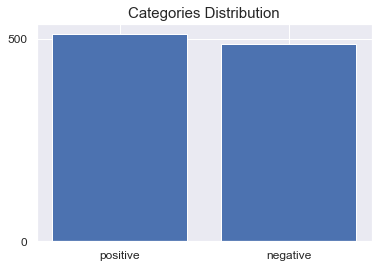

In [57]:
import matplotlib.pyplot as plt
categories = ['positive', 'negative']

plt.title('Categories Distribution', fontsize=15)
plt.bar(categories, df_Sample.Scores.value_counts())

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    3.2 Feature Creation
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Add a new column on the dataframe which store the unigrams of the sentences of each data. I'll first remove all the punctuation from each sentences, lowercase each words, then tokenize them into unigrams vector
</div>

In [58]:
import nltk
import string

puncLen = len(string.punctuation)
df_Asgm['unigrams'] = df_Asgm['Sentences']

# Tokenization
X_uni = df_Asgm['unigrams'].values
for i in range(len(X_uni)):
    s = X_uni[i]
    s = s.lower().translate(str.maketrans(string.punctuation, puncLen*':')) #remove punctuation with replacing them into ':'
    s.strip() #remove white space
    s = s.replace(':','') #replace back ':' into string empty
    s = dmh.tokenize_text(s)
    X_uni[i] = s

df_Asgm['unigrams'] = pd.DataFrame(data = X_uni)

rows, cols = df_Asgm.shape

print("Rows : " + str(rows))
print("Cols : " + str(cols))
df_Asgm[['unigrams']].head(20)

Rows : 2983
Cols : 3


unigrams
0   [so, there, is, no, way, for, me, to, plug, it...
1                      [good, case, excellent, value]
2                          [great, for, the, jawbone]
3   [tied, to, charger, for, conversations, lastin...
4                               [the, mic, is, great]
5   [i, have, to, jiggle, the, plug, to, get, it, ...
6   [if, you, have, several, dozen, or, several, h...
7    [if, you, are, razr, owneryou, must, have, this]
8           [needless, to, say, i, wasted, my, money]
9              [what, a, waste, of, money, and, time]
10              [and, the, sound, quality, is, great]
11  [he, was, very, impressed, when, going, from, ...
12  [if, the, two, were, seperated, by, a, mere, 5...
13                      [very, good, quality, though]
14  [the, design, is, very, odd, as, the, ear, cli...
15  [highly, recommend, for, any, one, who, has, a...
16         [i, advise, everyone, do, not, be, fooled]
17                                [so, far, so, good]
18                                     [works, great]
19  [it, clicks, into, place, in, a, way, that, ma...

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    3.3 Feature subset selection
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Produce the term-document matrix by CountVectorizer from sklearn
</div>

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
tfMAT = count_vect.fit_transform(df_Asgm.Sentences)
tfMAT.shape

(2983, 5159)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Examine the first 10 terms
</div>

In [60]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, I have done some data visualization, included word cloud, bar chart with frequency log(for better visualization), long tail graph
</div>

In [61]:
from wordcloud import WordCloud
from collections import Counter
import seaborn as sborn

In [62]:
def wordCloud(counter):
    wc = WordCloud(width = 1200, height = 800,
                  background_color = "black")
    
    wc.generate_from_frequencies(counter)
    
    fig = plt.figure(figsize = (6, 4))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()

<div style="font-size:15px; font-family:Comic Sans MS;">
    Generate a list 'term_frequencies' to store the frequency of each term
</div>

In [63]:
#Count the frequency of each term
term_frequencies = []
for j in range(0,tfMAT.shape[1]):
    term_frequencies.append(sum(tfMAT[:,j].toarray()))

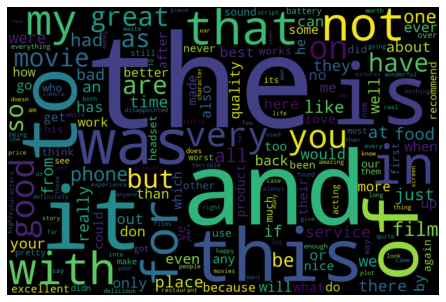

In [64]:
feature_names = count_vect.get_feature_names()

counter = Counter()
for wrd, fq in zip(feature_names, term_frequencies):
    counter[wrd] = fq[0]

wordCloud(counter)

In [65]:
term_frequencies = np.asarray(tfMAT.sum(axis=0))[0]

In [66]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<div style="font-size:15px; font-family:Comic Sans MS;">
    Plot the first 100 of the terms in barchart with frequency log
</div>

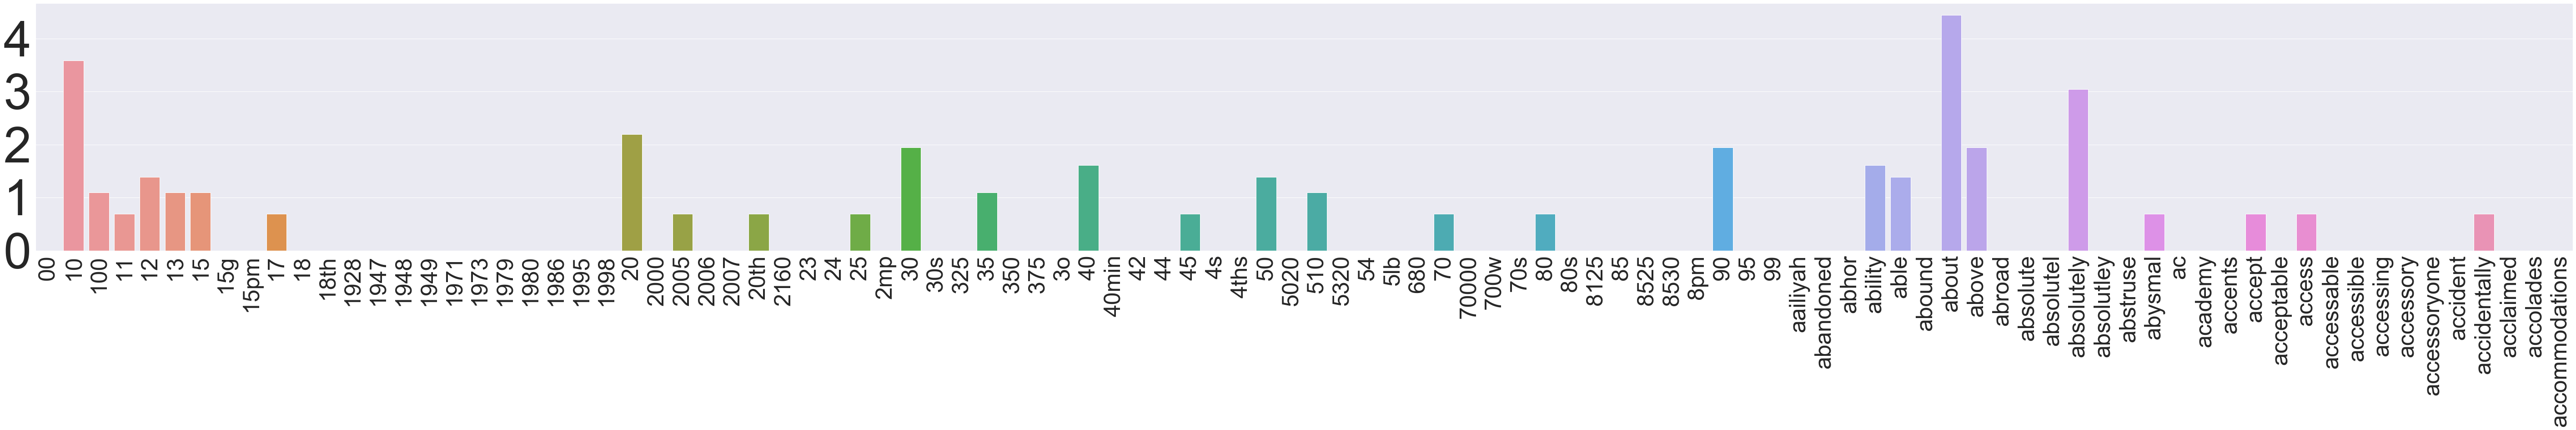

In [67]:
plt.subplots(figsize=(100, 10))
g = sborn.barplot(x=count_vect.get_feature_names()[:100],
                y=term_frequencies_log[:100])

sborn.set(font_scale=2)

g.set_xticklabels(count_vect.get_feature_names()[:100], fontsize=50);
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

<div style="font-size:15px; font-family:Comic Sans MS;">
    Also, I sorted the term by its frequency in descending order,and plot the top 50 of them in barchart
</div>

In [68]:
#Makes the list into pandas dataframe
dfMAT = pd.DataFrame({'Terms' : count_vect.get_feature_names(),
                  'Freq'  : term_frequencies})

dfMAT.sort_values(by=['Freq'], inplace=True, ascending=False)

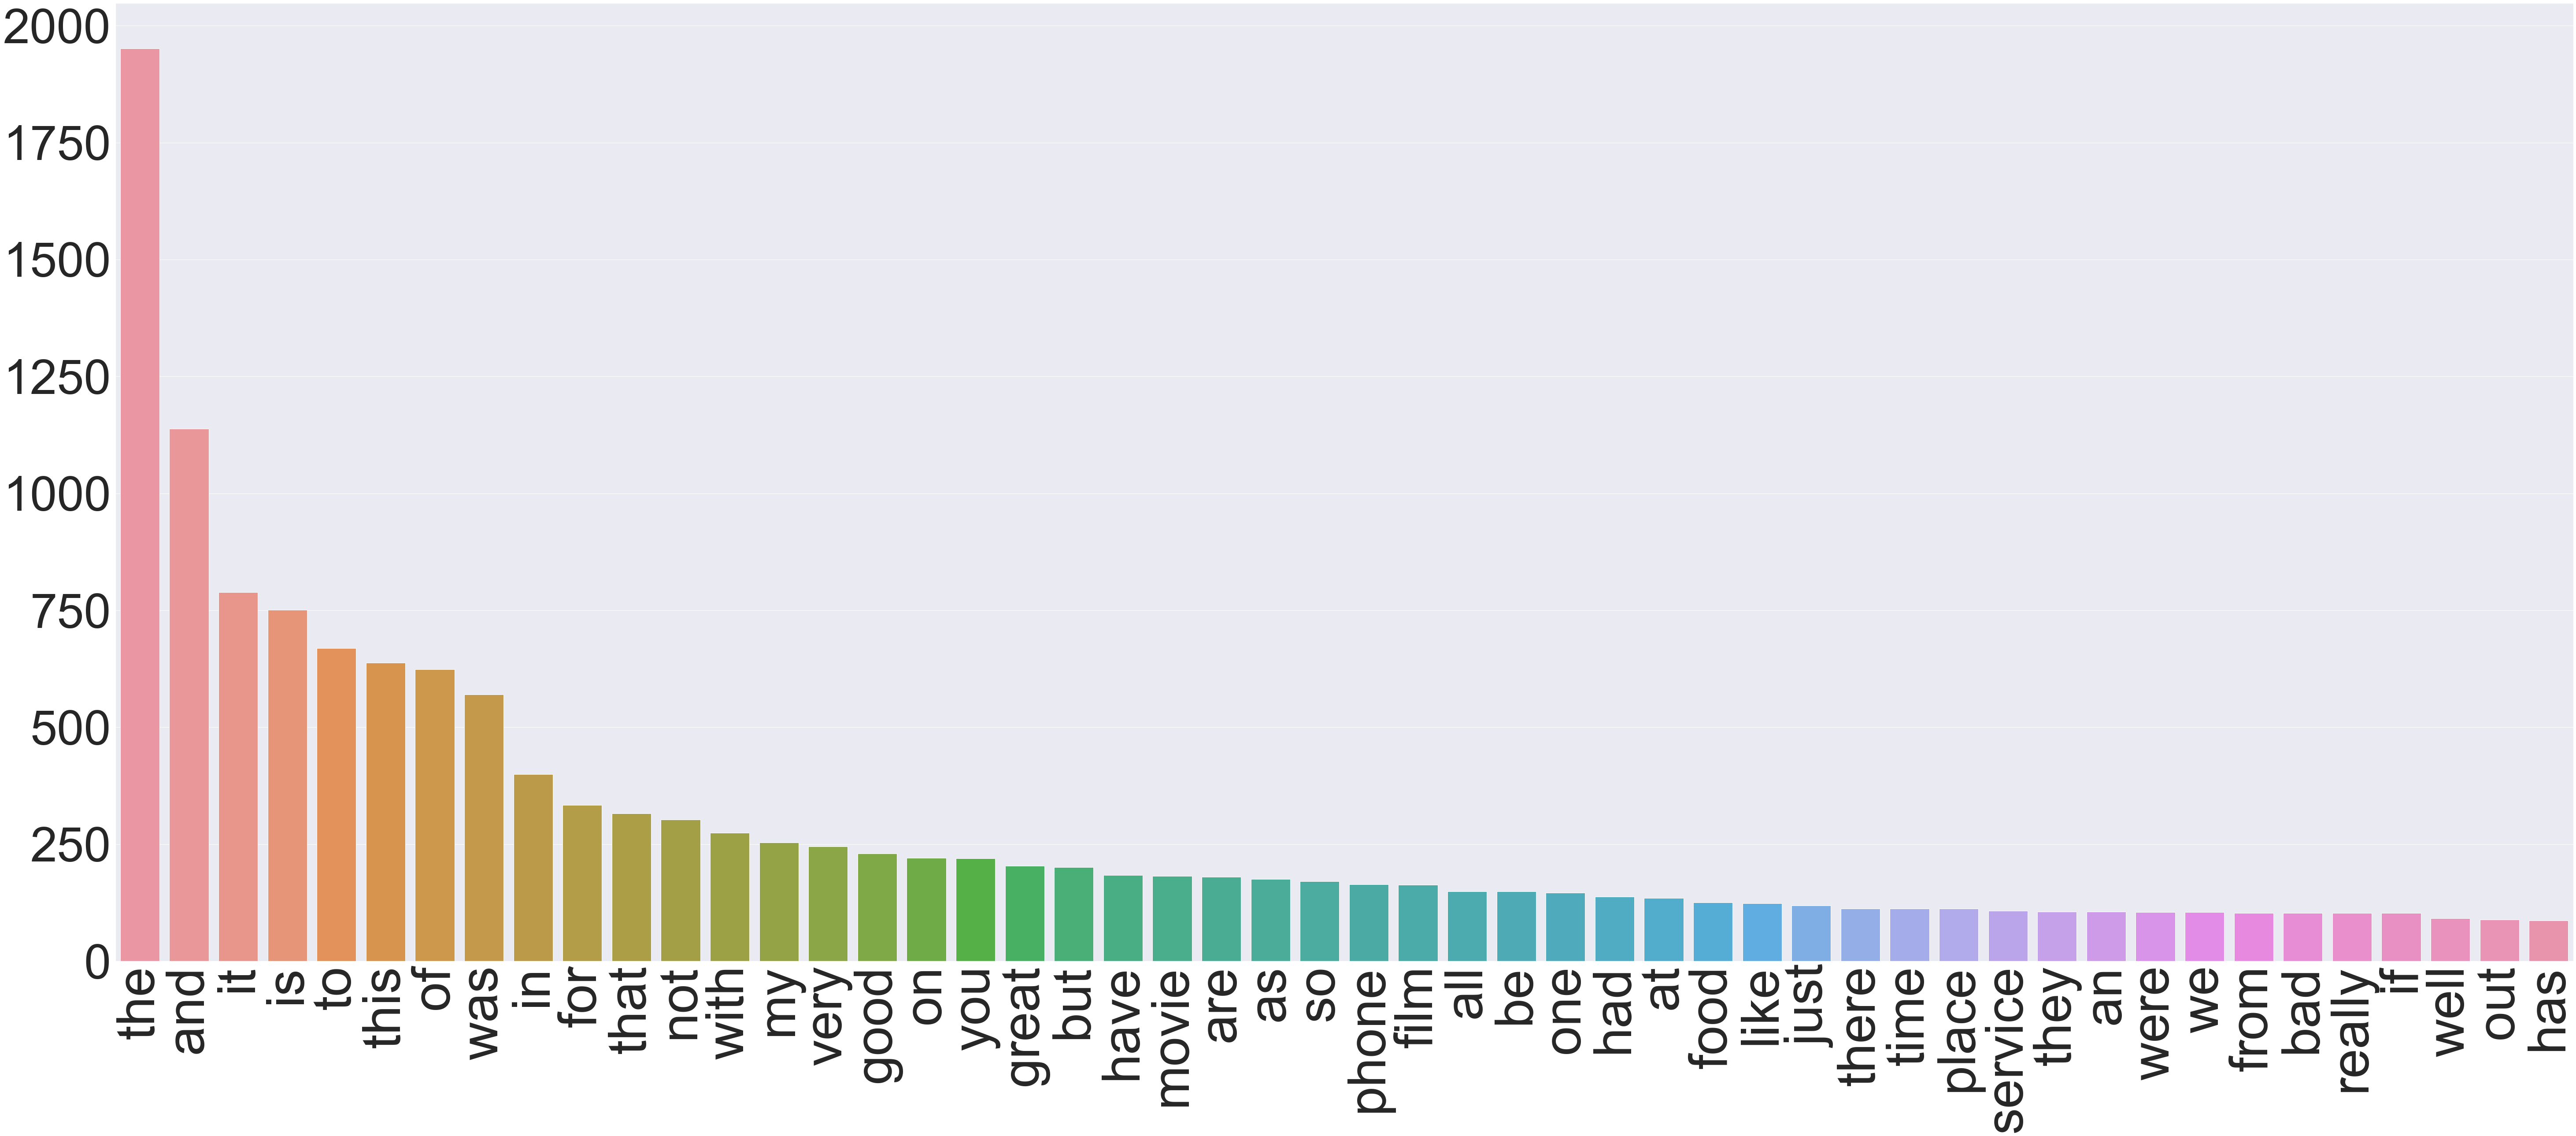

In [69]:
TERMS = dfMAT['Terms'].values
FREQ = dfMAT['Freq'].values

sborn.set(font_scale=10)

plt.subplots(figsize=(100, 40))
g = sborn.barplot(x = TERMS.tolist()[:50], 
                y = FREQ.tolist()[:50])
g.set_xticklabels(TERMS.tolist()[:50], fontsize=120);
g.set_xticklabels(TERMS.tolist()[:50], rotation=90);

<div style="font-size:15px; font-family:Comic Sans MS;">
    And the long tail graph
</div>

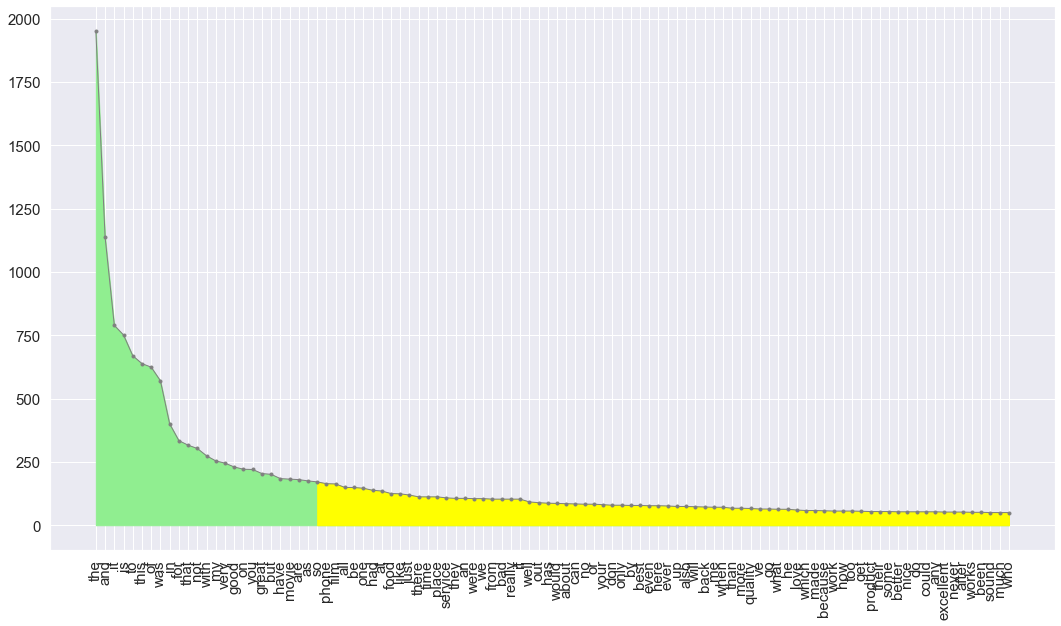

In [70]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot()

ax.plot(TERMS.tolist()[:100], FREQ.tolist()[:100], marker='.', color = 'grey', lw = 1)

ax.xaxis.set_tick_params(labelsize=15, rotation=90)
ax.yaxis.set_tick_params(labelsize=15)

T = TERMS.tolist()[:100]
F = FREQ.tolist()[:100]

d = FREQ[:100].mean()
ax.fill_between(T, F, color = 'lightgreen', interpolate = True)
ax.fill_between(T, F, where = F <= d, color='yellow', interpolate = True)

plt.show()

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    3.4 Dimensionality Reduction
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Do the PCA to reduce the dimensionality, and plot it into 3d graph.
</div>

In [71]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D #import Axes3D for plottin 3d scatter

In [72]:
X_reduced = PCA(n_components = 3).fit_transform(tfMAT.toarray())
X_reduced.shape

(2983, 3)

In [73]:
# categories
categories = [1, 0]
label = ['positive', 'negative']
colors = ['purple', 'green']

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning:


The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning:


The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning:


The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning:


The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.

C:\Users\ywleo\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning:


The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.



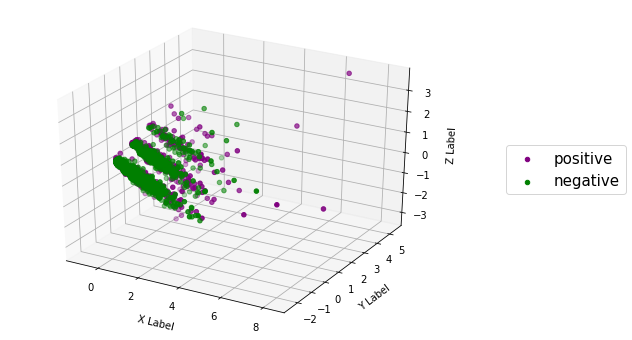

In [74]:
# plot
sborn.reset_orig()

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection='3d')

for c, category, lbl in zip(colors, categories, label):
    xs = X_reduced[df_Asgm['Scores'] == category].T[0]
    ys = X_reduced[df_Asgm['Scores'] == category].T[1]
    zs = X_reduced[df_Asgm['Scores'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o',label = lbl)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

#ax.set_xlim3d(-25, 750)
#ax.set_ylim3d(-200,250)
#ax.set_zlim3d(-100,250)
ax.legend(loc = 'center left', bbox_to_anchor = (1.1, 0.5), fontsize=15)

plt.show()

<div style="font-size:15px; font-family:Comic Sans MS;">
    Note that, I didn't do the Label Binarization in this dataset, because it's just had two categories on it, one is positive statement, another is negative statement.
</div>

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">4.Data Exploration</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    I picked the five sampling sentences, and compute their cosine similarity with each other.
</div>

In [75]:
df_Sampling = df_Asgm.sample(n = 5)

document_1 = df_Sampling['Sentences'].values[0]
document_2 = df_Sampling['Sentences'].values[1]
document_3 = df_Sampling['Sentences'].values[2]
document_4 = df_Sampling['Sentences'].values[3]
document_5 = df_Sampling['Sentences'].values[4]

print("First sentence : ", end = "")
print(document_1)

print("Second sentence : ", end = "")
print(document_2)

print("Third sentence : ", end = "")
print(document_3)

print("Fourth sentence : ", end = "")
print(document_4)

print("Fifth sentence : ", end = "")
print(document_5)

First sentence : Also, it's a real treat to see Anthony Quinn playing Crazy Horse.  
Second sentence : This is an unbelievable BARGAIN!
Third sentence : there is no real plot.  
Fourth sentence : Bela Lugosi was totally extraneous, intoning odd lines.  
Fifth sentence : The acting, as you'd expect from this cast, is top notch.  


<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, compute the count vector and binarize them.
</div>

In [76]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vc_1 = count_vect.transform([document_1])
document_vc_2 = count_vect.transform([document_2])
document_vc_3 = count_vect.transform([document_3])
document_vc_4 = count_vect.transform([document_4])
document_vc_5 = count_vect.transform([document_5])

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vc_1_bin = binarize(document_vc_1)
document_vc_2_bin = binarize(document_vc_2)
document_vc_3_bin = binarize(document_vc_3)
document_vc_4_bin = binarize(document_vc_4)
document_vc_5_bin = binarize(document_vc_5)

In [77]:
# print
print("Vector Count:")
print("1.", end="")
print(document_vc_1.todense())

print("2.", end="")
print(document_vc_2.todense())

print("3.", end="")
print(document_vc_3.todense())

print("4.", end="")
print(document_vc_4.todense())

print("5.", end="")
print(document_vc_5.todense())

Vector Count:
1.[[0 0 0 ... 0 0 0]]
2.[[0 0 0 ... 0 0 0]]
3.[[0 0 0 ... 0 0 0]]
4.[[0 0 0 ... 0 0 0]]
5.[[0 0 0 ... 0 0 0]]


In [78]:
# print
print("Binarization Result:")
print("1.", end="")
print(document_vc_1_bin.todense())

print("2.", end="")
print(document_vc_2_bin.todense())

print("3.", end="")
print(document_vc_3_bin.todense())

print("4.", end="")
print(document_vc_4_bin.todense())

print("5.", end="")
print(document_vc_5_bin.todense())

Binarization Result:
1.[[0 0 0 ... 0 0 0]]
2.[[0 0 0 ... 0 0 0]]
3.[[0 0 0 ... 0 0 0]]
4.[[0 0 0 ... 0 0 0]]
5.[[0 0 0 ... 0 0 0]]


<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, compute the cosine similarity of each other
</div>

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

document_vcs = [document_vc_1, document_vc_2, document_vc_3, document_vc_4, document_vc_5 ]
n = len(document_vcs)

for i in range(n):
    vc = document_vcs[i]
    
    print("Cosine Similarity between document " + str(i + 1) + " and :")
    for j in range(n):
        vc2 = document_vcs[j]
        cos_sim = cosine_similarity(vc, vc2, dense_output=True)
        print("document " + str(j + 1) + " : %(x)f" %{"x":cos_sim})
        
    print()

Cosine Similarity between document 1 and :
document 1 : 1.000000
document 2 : 0.000000
document 3 : 0.134840
document 4 : 0.000000
document 5 : 0.000000

Cosine Similarity between document 2 and :
document 1 : 0.000000
document 2 : 1.000000
document 3 : 0.200000
document 4 : 0.000000
document 5 : 0.269680

Cosine Similarity between document 3 and :
document 1 : 0.134840
document 2 : 0.200000
document 3 : 1.000000
document 4 : 0.000000
document 5 : 0.134840

Cosine Similarity between document 4 and :
document 1 : 0.000000
document 2 : 0.000000
document 3 : 0.000000
document 4 : 1.000000
document 5 : 0.000000

Cosine Similarity between document 5 and :
document 1 : 0.000000
document 2 : 0.269680
document 3 : 0.134840
document 4 : 0.000000
document 5 : 1.000000



<div style="font-size:15px; font-family:Comic Sans MS;">
    Generate the TF-IDF features from the tokens of each sentence.
</div>

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [81]:
sentences = []
for s in df_Asgm['Sentences'].values:
    sentences.append(s)
    
sentences[:5]

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.']

In [82]:
doc_matr = vectorizer.fit_transform(sentences)
doc_matr.shape

(2983, 5159)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's see the top 30 tfidf value keywords with corresponding tf-idf score
</div>

In [83]:
def sort_features_by_tfidf_score_desc(featmatrix):
    tuples = zip(featmatrix.col, featmatrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [84]:
def shows_topN_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    importance_feat= {}
    for idx in range(len(feature_vals)):
        importance_feat[feature_vals[idx]]=score_vals[idx]
    
    return importance_feat

In [85]:
feature_names = count_vect.get_feature_names()
#sort the tf-idf vectors by descending order of scores
sorted_items = sort_features_by_tfidf_score_desc(doc_matr.tocoo())

#extract only the top n; n here is 30
keywords = shows_topN_from_vector(feature_names,sorted_items,30)

for k in keywords:
    print(k,keywords[k])

worthwhile 1.0
pleased 1.0
incredible 1.0
horrible 1.0
excellent 1.0
disappointment 1.0
disappointing 1.0
disappointed 1.0
delicious 1.0
brilliant 1.0
awful 1.0
avoid 1.0
10 1.0
waited 0.979
aggravating 0.958
mortified 0.948
hated 0.947
liked 0.931
enjoyed 0.931
loved 0.921
shameful 0.92
displeased 0.919
sooooo 0.917
infuriating 0.917
packed 0.912
horrendous 0.912
truly 0.911
disgrace 0.909


<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, let's examine its word cloud.
</div>

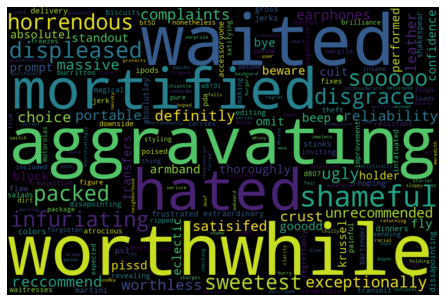

In [86]:
#extract only the top n; n here is 30
keywords_all = shows_topN_from_vector(feature_names,sorted_items, doc_matr.shape[1])
wordCloud(keywords_all)

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">5.Naive Bayes Classification</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    I would like to do the Naive Bayes Classifier in two situations. One is with full sentences, another is with sentences after STEMMING.
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    First of all, Let's build a function to plot the confusion matrix result later.
</div>

In [87]:
def Plot_Confusion_Matrix(confmat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    plt.show()

<font style="color:green; font-size:16px; font-family:Comic Sans MS; font-weight:bold;">5.1 Without STEMMING</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Here, I compute the <font style="background-color:lightgrey; font-weight:bold;">tf_features</font> and <font style="background-color:lightgrey; font-weight:bold;">tfidf_features</font> from each of the full sentence again(for not confusing), then Training them with Naive Bayes Classifiers.
</div>

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    5.1.1 Terms frequency, tf features
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Count each term frequency
</div>

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

count_vect = CountVectorizer()
tf_features = count_vect.fit_transform(df_Asgm['Sentences']) #by full sentences
tf_features.shape

(2983, 5159)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's check if the tf_features work fine by randomly choosing one sentence
</div>

In [89]:
ALL_sent = df_Asgm['Sentences'].values
rand_sel_sent = df_Asgm.sample(n = 1)['Sentences'].values[0]
print(rand_sel_sent)
sent_idx = ALL_sent.tolist().index(rand_sel_sent)

fn = count_vect.get_feature_names()
vl = np.array(tf_features.todense())[sent_idx]
for i in range(len(vl)):
    if vl[i] > 0:
        print(vl[i], end= " ")
        print(fn[i])

Internet is excrutiatingly slow.
1 excrutiatingly
1 internet
1 is
1 slow


<div style="font-size:15px; font-family:Comic Sans MS;">
    Apparently, it works great. :)
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Training
</div>

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(np.array(tf_features.todense()), df_Asgm['Scores'].values, test_size=0.2, random_state=1)
NBmodel = MultinomialNB().fit(X_train, y_train)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Testing and Accuracies
</div>

In [91]:
y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.9422
Testing Accuracy : 0.8291


<div style="font-size:15px; font-family:Comic Sans MS;">
    I got 94.22% Training Accuracy and 82.91% Testing Accuracy. Let's show its Confusion Matrix.
</div>

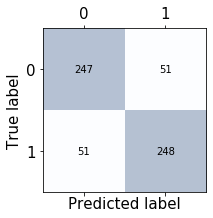

In [92]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
Plot_Confusion_Matrix(confmat)

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    5.1.2 TF-IDF features
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, Build TF-IDF feature
</div>

In [93]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(tf_features)
tfidf_features = transformer.transform(tf_features)
tfidf_features.shape

(2983, 5159)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's check if the tfidf_features work fine by randomly choosing one sentence
</div>

In [94]:
ALL_sent = df_Asgm['Sentences'].values
rand_sel_sent = df_Asgm.sample(n = 1)['Sentences'].values[0]
print(rand_sel_sent)
sent_idx = ALL_sent.tolist().index(rand_sel_sent)

fn = count_vect.get_feature_names()
vl = np.array(tfidf_features.todense())[sent_idx]
for i in range(len(vl)):
    if vl[i] > 0:
        print(vl[i], end= " ")
        print(fn[i])

Not easy to watch.  
0.6258546463925118 easy
0.3531266728267043 not
0.28138569342578945 to
0.6359478013662232 watch


<div style="font-size:15px; font-family:Comic Sans MS;">
    Apparently, it works great as well. :)
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Training
</div>

In [95]:
X_train, X_test, y_train, y_test = train_test_split(np.array(tfidf_features.todense()), df_Asgm['Scores'].values, test_size=0.2, random_state=1)
NBmodel = MultinomialNB().fit(X_train, y_train)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Testing and Accuracies
</div>

In [96]:
y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.9484
Testing Accuracy : 0.8291


<div style="font-size:15px; font-family:Comic Sans MS;">
    I got 94.84% Training Accuracy and 82.91% Testing Accuracy. Let's show its Confusion Matrix.
</div>

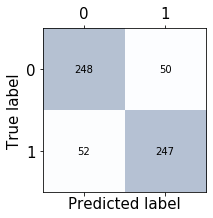

In [97]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
Plot_Confusion_Matrix(confmat)

<font style="color:green; font-size:16px; font-family:Comic Sans MS; font-weight:bold;">5.2 With STEMMING</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    In this part, I do some stemming on every sentences first. So that some of the words could be considered as same meaning, eg 'takes' and 'take' are similar
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Stemming each sentences, and store it into new column 'Sentences_Stemming' in the dataframe.
</div>

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
import string

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()

stemmer = PorterStemmer()

puncLen = len(string.punctuation)
df_Asgm['Sentences_Stemming'] = df_Asgm['Sentences']
sents = df_Asgm['Sentences_Stemming'].values

for i in range(len(sents)):
    temp = []
    for words in analyze(sents[i]):
        words = words.translate(str.maketrans(string.punctuation, puncLen*':')) #remove punctuation with replacing them into ':'
        words.strip() #remove white space
        temp.append(stemmer.stem(words.replace(':',''))) #replace back ':' into string empty
    
    sents[i] = " ".join(temp).strip(" ")

df_Asgm['Sentences_Stemming'] = pd.DataFrame(data = sents)
print(df_Asgm.shape)
df_Asgm.tail(10)

(2983, 4)


Sentences  Scores  \
2973  The refried beans that came with my meal were ...       0   
2974         Spend your money and time some place else.       0   
2975  A lady at the table next to us found a live gr...       0   
2976            the presentation of the food was awful.       0   
2977           I can't tell you how disappointed I was.       0   
2978  I think food should have flavor and texture an...       0   
2979                           Appetite instantly gone.       0   
2980  Overall I was not impressed and would not go b...       0   
2981  The whole experience was underwhelming, and I ...       0   
2982  Then, as if I hadn't wasted enough of my life ...       0   

                                               unigrams  \
2973  [the, refried, beans, that, came, with, my, me...   
2974  [spend, your, money, and, time, some, place, e...   
2975  [a, lady, at, the, table, next, to, us, found,...   
2976     [the, presentation, of, the, food, was, awful]   
2977    [i, cant, tell, you, how, disappointed, i, was]   
2978  [i, think, food, should, have, flavor, and, te...   
2979                        [appetite, instantly, gone]   
2980  [overall, i, was, not, impressed, and, would, ...   
2981  [the, whole, experience, was, underwhelming, a...   
2982  [then, as, if, i, hadnt, wasted, enough, of, m...   

                                     Sentences_Stemming  
2973  the refri bean that came with my meal were dri...  
2974           spend your money and time some place els  
2975  ladi at the tabl next to us found live green c...  
2976                      the present of the food wa aw  
2977                     can tell you how disappoint wa  
2978  think food should have flavor and textur and b...  
2979                             appetit instantli gone  
2980        overal wa not impress and would not go back  
2981  the whole experi wa underwhelm and think we ll...  
2982  then as if hadn wast enough of my life there t...

<div style="font-size:15px; font-family:Comic Sans MS;">
    Check the dataframe consist of any missing value
</div>

In [99]:
df_Asgm.isnull().sum()

Sentences             0
Scores                0
unigrams              0
Sentences_Stemming    0
dtype: int64

<div style="font-size:15px; font-family:Comic Sans MS;">
    Check the dataframe consist of any duplicate value
</div>

In [100]:
df_Asgm[['Sentences','Sentences_Stemming','Scores']].duplicated().sum()

0

<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, build Naive Bayes Classifier for TF-IDF features, and TF features respectively.
</div>

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    5.2.1 Terms frequency, tf features
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Again,count each term frequency
</div>

In [101]:
count_vect = CountVectorizer()
tf_features = count_vect.fit_transform(df_Asgm['Sentences_Stemming'])
tf_features.shape

(2983, 4064)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's check if the tf_features work fine by randomly choosing one sentence
</div>

In [102]:
ALL_sent = df_Asgm['Sentences_Stemming'].values
rand_sel_sent = df_Asgm.sample(n = 1)['Sentences_Stemming'].values[0]
print(rand_sel_sent)
sent_idx = ALL_sent.tolist().index(rand_sel_sent)

fn = count_vect.get_feature_names()
vl = np.array(tf_features.todense())[sent_idx]
for i in range(len(vl)):
    if vl[i] > 0:
        print(vl[i], end= " ")
        print(fn[i])

summari the wittic weren witti
1 summari
1 the
1 weren
1 witti
1 wittic


<div style="font-size:15px; font-family:Comic Sans MS;">
    Apparently, it works great. :)
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Training
</div>

In [103]:
X_train, X_test, y_train, y_test = train_test_split(np.array(tf_features.todense()), df_Asgm['Scores'].values, test_size=0.2, random_state=1)
NBmodel = MultinomialNB().fit(X_train, y_train)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Testing and Accuracies
</div>

In [104]:
y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.9367
Testing Accuracy : 0.8375


<div style="font-size:15px; font-family:Comic Sans MS;">
    I got 93.67% Training Accuracy and 83.75% Testing Accuracy. Let's show its Confusion Matrix.
</div>

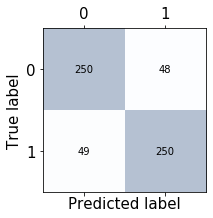

In [105]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
Plot_Confusion_Matrix(confmat)

<div style="font-size:16px; font-family:Comic Sans MS; color: blue;">
    5.2.2 TF-IDF features
</div>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Now, Build TF-IDF feature
</div>

In [106]:
transformer = TfidfTransformer().fit(tf_features)
tfidf_features = transformer.transform(tf_features)
tfidf_features.shape

(2983, 4064)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Let's check if the tfidf_features work fine by randomly choosing one sentence
</div>

In [107]:
ALL_sent = df_Asgm['Sentences_Stemming'].values
rand_sel_sent = df_Asgm.sample(n = 1)['Sentences_Stemming'].values[0]
print(rand_sel_sent)
sent_idx = ALL_sent.tolist().index(rand_sel_sent)

fn = count_vect.get_feature_names()
vl = np.array(tfidf_features.todense())[sent_idx]
for i in range(len(vl)):
    if vl[i] > 0:
        print(vl[i], end= " ")
        print(fn[i])

the rang is veri decent ve been abl to roam around my hous with the phone in the live room with no recept sound qualiti issu
0.2727084319723978 abl
0.22156184941772292 around
0.1885011651866934 been
0.24713514069506032 decent
0.24361872303054297 hous
0.11361433433703604 in
0.09289702733981903 is
0.2659817764960488 issu
0.2321757242777985 live
0.1319371713062902 my
0.1718254178898969 no
0.14393095496572927 phone
0.1769579096861008 qualiti
0.26029447032733943 rang
0.22544906880144952 recept
0.3065144841906481 roam
0.2553679016359732 room
0.18491636110685022 sound
0.19987566317221425 the
0.09803372934251892 to
0.1804193020451091 ve
0.13177499759240277 veri
0.2530123171997887 with


<div style="font-size:15px; font-family:Comic Sans MS;">
    Apparently, it works great as well. :)
</div>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Training
</div>

In [108]:
X_train, X_test, y_train, y_test = train_test_split(np.array(tfidf_features.todense()), df_Asgm['Scores'].values, test_size=0.2, random_state=1)
NBmodel = MultinomialNB().fit(X_train, y_train)

<div style="font-size:15px; font-family:Comic Sans MS;">
    Testing and Accuracies
</div>

In [109]:
y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy : %.4f" %accuracy_score(y_pred_test, y_test))

Training Accuracy : 0.9396
Testing Accuracy : 0.8375


<div style="font-size:15px; font-family:Comic Sans MS;">
    I got 93.96% Training Accuracy and 83.75% Testing Accuracy. Let's show its Confusion Matrix.
</div>

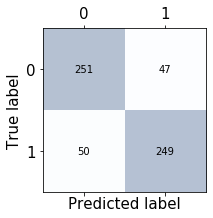

In [110]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
Plot_Confusion_Matrix(confmat)

<font style="color:purple; font-size:18px; font-family:Comic Sans MS; font-weight:bold;">6. Statistics and Conclusion</font>
<div style="font-size:15px; font-family:Comic Sans MS;">
    Here, I created a table to summarize the result achieved above.
</div>

<font style="font-size:20px; font-family:Andale Mono,monospace;">ACCURACIES</font>
<table style="float:left; width:70%; font-size:16px;">
    <tr>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>NAIVE BAYES CLASSIFICATION</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>Training Accuracy</b>
        </th>
        <th style="color:white; background-color:#2E8B57;text-align:center;border:#006400 1px solid;">
            <b>Testing Accuracy</b>
        </th>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>TF-features</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>94.22%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>82.91%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>TF-features<br />(with STEMMING)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>94.84%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>82.91%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>TFIDF-features</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>93.67%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>83.75%</b>
        </td>
    </tr>
    <tr>
        <td style="background-color:#2E8B57;text-align:center;border:#006400 1px solid; color:white;">
            <b>TFIDF-features<br />(with STEMMING)</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>93.96%</b>
        </td>
        <td style="background-color:#90EE90;text-align:center;border:#006400 1px solid;">
            <b>83.75%</b>
        </td>
    </tr>
</table>

<div style="font-size:15px; font-family:Comic Sans MS;">
    Well, I didn't find much different from using TF features and TFIDF features on Naive Bayes Classification. There might have something I should've done it before training model, but I've tried my best to make this result. Here is what my conclusion, I think TF and TF-IDF technique aren't always work for all cases, that's why the result seens exacty the same on testing accuracy with both TF and TF-IDF technique (There is still a little bit difference if we look at the confusion matrix).
</div>

---

<div style="font-size:15px; font-family:Comic Sans MS;">
    Finally, there is a question asked in the INSTRUCTION 4.(Wish that I didn't misunderstanding on this question. LOL)
</div>

<div style="font-size:15px; font-family:Comic Sans MS; color: green">
    No 1.
</div>

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    The very First, I have found that the drop_duplicates() in <font style="font-size:19px; color:red;">'4.2 Dealing with Duplicate Data'</font> part have something we need to notice about.<br /><br />
    1. drop_duplicates(keep=False, inplace=True) with the value of argument 'keep', false, would delete all duplicates data wihout keeping the first occurance of the data. These could make us lost of information if there is a lot duplicated data in the datasets. To overcome this problem, we can just change the value of the argument 'keep' to 'first' instead of False.
</div>

In [111]:
prb = ['A','B','C','C','D']
df_prb = pd.DataFrame(data = prb)
df_sol = pd.DataFrame(data = prb)
df_prb.head(5)

0
0  A
1  B
2  C
3  C
4  D

In [112]:
df_prb.duplicated().sum()

1

In [113]:
df_prb.drop_duplicates(keep = False, inplace = True)
df_prb.duplicated().sum()

0

In [114]:
df_prb.head(5)

0
0  A
1  B
4  D

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    Oops, those two 'C' are deleted. However, if we change to drop_duplicates(keep='first', inplace=True)
</div>

In [115]:
df_sol.duplicated().sum()

1

In [116]:
df_sol.drop_duplicates(keep = 'first', inplace = True)
df_sol.duplicated().sum()

0

In [117]:
df_sol.head(5)

0
0  A
1  B
2  C
4  D

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    Now, it keeps the first occur duplicate data.
</div>

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    2.Although, the point 1 could solve the problem stated, it still makes a index problem on the datasets. For example, if we drop the duplicated data on index 18, the datasets wouldn't reset the index and will show out the table with indexes 1,2,3,...,17,19,... which skipped the index 18. This could make us face a problem on matching datas. To overcome this problem, we could use pandas reset_index(drop=True) which will reset all the indexes.
</div>

In [118]:
df_sol.head(5)

0
0  A
1  B
2  C
4  D

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    Notice that, the indexes don't arrange in proper order. Use reset_index() could help us solve this problem
</div>

In [119]:
df_sol = df_sol.reset_index(drop=True)
df_sol.head(5)

0
0  A
1  B
2  C
3  D

<div style="font-size:15px; font-family:Comic Sans MS; color: green">
    No 2.
</div>

<div style="font-size:15px; font-family:Comic Sans MS; background-color: #CBC0FF">
    On <font style="font-size:19px; color:red;">'5.3 Feature subset selection'</font> part, we knew that the example is just show us that we have another visualization call heatmap to plot the result. As mentioned in the Lab, this heatmap is not efficient on this case(terms frequency plot). In my opinion, we could use barchart, histrogram, word cloud, pie chart, etc to show the first n or top n feature(since there are too many feature on there, showing part of them would be more meaningful than just show all of them.), which I've answered it on one of the take home execises.
</div>